
### Download the dataset file [athlete_events.csv](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results) from Kaggle page. 

In [1]:
import pandas as pd
import numpy as np

In [151]:
data = pd.read_csv("athlete_events.csv")
data.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


### 1. How old were the youngest male and female participants of the 1996 Olympics?

16 and 15  
14 and 12  
16 and 12  
13 and 11  

In [3]:
x = data.groupby(["Year","Sex"])["Age"].min().reset_index()
x.loc[x['Year'] == 1996]

,Year,Sex,Age
47,1996,F,12.0
48,1996,M,14.0


### 2. What was the percentage of male gymnasts among all the male participants of the 2000 Olympics? Round the answer to the first decimal.

Hint: here and further if needed drop duplicated sportsmen to count only unique ones.

0.2  
1.5  
2.5  
7.7  

In [133]:
x = data.drop_duplicates(subset=["Name"]) 
y = x[x["Year"] == 2000]
z = y[y["Sex"] == "M"]
total = z["Sex"].value_counts()[0]
gymnasts = z[z["Sport"] == "Gymnastics"]["Sex"].value_counts()[0]
round(gymnasts*100/total,1)


1.5

### 3. What are the mean and standard deviation of height for female basketball players participated in the 2000 Olympics? Round the answer to the first decimal.

178.5 and 7.2  
179.4 and 10  
180.7 and 6.7  
182.4 and 9.1  

In [49]:
x = data.groupby(["Year","Sport","Sex"])["Height"].agg([np.mean,np.std]).reset_index()
x = x.loc[ (x['Sex'] == "F") & (x["Sport"] == "Basketball") & (x["Year"] == 2000)]
round(x,1)

,Year,Sport,Sex,mean,std
974,2000,Basketball,F,182.4,9.1



### 4. Find a sportsperson participated in the 2002 Olympics, with the highest weight among other participants of the same Olympics. What sport did he or she do?

Judo  
Bobsleigh  
Weightlifting  
Boxing  

In [62]:
x = data.groupby(["Year","Sport"])["Weight"].max().reset_index()
x[x["Year"]==2002]

,Year,Sport,Weight
712,2002,Alpine Skiing,105.0
713,2002,Biathlon,90.0
714,2002,Bobsleigh,123.0
715,2002,Cross Country Skiing,90.0
716,2002,Curling,102.0
717,2002,Figure Skating,90.0
718,2002,Freestyle Skiing,91.0
719,2002,Ice Hockey,113.0
720,2002,Luge,100.0
721,2002,Nordic Combined,83.0



### 5. How many times did Pawe Abratkiewicz participate in the Olympics held in different years?

0  
1  
2  
3  

In [81]:
x = data.groupby(["Name","Year",])["Games"].count().reset_index()
(x[x["Name"] == "Pawe Abratkiewicz"]).shape[0]

3

### 6. How many silver medals in tennis did Australia win at the 2000 Olympics?

0  
1  
2  
3  

In [108]:
x = data.groupby(["Year","Team","Sport"])["Medal"].count().reset_index()
x[(x["Year"] == 2000) & (x["Team"] == "Australia") & (x["Sport"]=="Tennis")]

,Year,Team,Sport,Medal
18120,2000,Australia,Tennis,2


### 7. Is it true that Switzerland won fewer medals than Serbia at the 2016 Olympics? Do not consider NaN values in Medal column.

Yes  
No  

In [115]:
x = data.groupby(["Year","Team"])["Medal"].count().reset_index()
x[ (x["Year"] == 2016) & (( x["Team"] == "Switzerland" ) | (x["Team"] == "Serbia") )]

,Year,Team,Medal
5117,2016,Serbia,54
5138,2016,Switzerland,11


### 8. What age category did the fewest and the most participants of the 2014 Olympics belong to?

[45-55] and [25-35) correspondingly  
[45-55] and [15-25) correspondingly  
[35-45] and [25-35) correspondingly  
[45-55] and [35-45) correspondingly  

/home/sourav/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


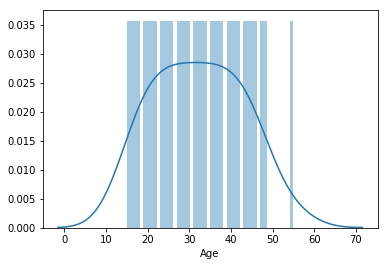

In [149]:
x = data.groupby(["Year","Age"])["Name"].count().reset_index()
x = x[x["Year"] == 2014]
import seaborn as sns
sns.distplot(x.Age,bins=50)

### 9. Is it true that there were Summer Olympics held in Lake Placid? Is it true that there were Winter Olympics held in Sankt Moritz?

Yes, Yes  
Yes, No  
No, Yes  
No, No  

In [160]:
data[(data["Season"] == "Summer") & (data["City"] == "Lake Placid")],\
data[(data["Season"] == "Winter") & (data["City"] == "Sankt Moritz")]

(Empty DataFrame
 Columns: [ID, Name, Sex, Age, Height, Weight, Team, NOC, Games, Year, Season, City, Sport, Event, Medal]
 Index: [],
             ID                                      Name Sex   Age  Height  \
 935        529           Karl Gustaf Emanuel Abrahamsson   M  31.0     NaN   
 1187       665                     Gilbert Achard-Picard   M  29.0     NaN   
 1439       802                    Tadeusz Ralf Adamowski   M  26.0   177.0   
 1454       810         Bridget Shirley Adams (-Bengough)   F  19.0     NaN   
 2707      1508                            Enrico Airoldi   M  24.0     NaN   
 2708      1509                              Remo Airoldi   M  26.0     NaN   
 5053      2876                  Theodor "Theo" Allenbach   M  23.0     NaN   
 5054      2876                  Theodor "Theo" Allenbach   M  23.0     NaN   
 5132      2921                           Fernando Alloni   M  22.0     NaN   
 5332      3022                    Pentti Johannes Alonen   M  22.0   172.0

### 10. What is the absolute difference between the number of unique sports at the 1995 Olympics and 2016 Olympics?

16  
24  
26  
34  

In [176]:
a=data[data['Year']==1995 ]
b=data[data['Year']==2016 ]
abs(a['Sport'].nunique()-b['Sport'].nunique())

34